In [3]:
import torch
from Compeletion3D import Completion3D
from torch_geometric.data import DataLoader
import numpy as np
from torch_geometric.data import DataLoader
import matplotlib.pylab  as plt
from mpl_toolkits.mplot3d import Axes3D
from Models import SaNet
%matplotlib inline

In [14]:
path = '../data/Completion3D/'
dataset = Completion3D(path, split='train',categories='Airplane')
batch_size = 2
device = torch.device('cuda')
model = SaNet().to(device)
test_loader = DataLoader(
    dataset, batch_size=batch_size, shuffle=False)
model.load_state_dict(torch.load('./trained/SA_net_Ch130.pt',map_location=device))

<All keys matched successfully>

In [15]:
gen_data = {
    'pred': np.empty([len(dataset),2048,3]),
    'true': np.empty([len(dataset),2048,3]),
    'original': np.empty([len(dataset),2048,3]),
}
model.eval()
for i,data in enumerate(test_loader):
    data = data.to(device)
    with torch.no_grad():
        begin = i*batch_size
        end = begin + len(data.category)
        gen_data['pred'][begin:end] = model(data)[0].cpu().numpy().reshape((-1,2048,3))
        gen_data['true'][begin:end] = data.y.cpu().numpy().reshape((-1,2048,3)) 
        gen_data['original'][begin:end] = data.pos.cpu().numpy().reshape((-1,2048,3)) 

In [16]:
def plot_3d_point_cloud(x, y, z, show=True, show_axis=True, in_u_sphere=False, marker='.', s=8, alpha=0.8, figsize=(15, 7), elev=20, azim=240, axis=None, title=None, *args, **kwargs):

    if axis is None:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111, projection='3d')        
    else:
        ax = axis
        fig = axis

    if title is not None:
        plt.title(title)

    sc = ax.scatter(x, y, z, marker=marker, s=s, alpha=alpha, *args, **kwargs)
    ax.view_init(elev=elev, azim=azim)

    if in_u_sphere:
        ax.set_xlim3d(-0.5, 0.5)
        ax.set_ylim3d(-0.5, 0.5)
        ax.set_zlim3d(-0.5, 0.5)
    else:
        miv = 0.7 * np.min([np.min(x), np.min(y), np.min(z)])  # Multiply with 0.7 to squeeze free-space.
        mav = 0.7 * np.max([np.max(x), np.max(y), np.max(z)])
        ax.set_xlim(miv, mav)
        ax.set_ylim(miv, mav)
        ax.set_zlim(miv, mav)
        plt.tight_layout()

    if not show_axis:
        plt.axis('off')

    if 'c' in kwargs:
        plt.colorbar(sc)

    if show:
        plt.show()

    return fig

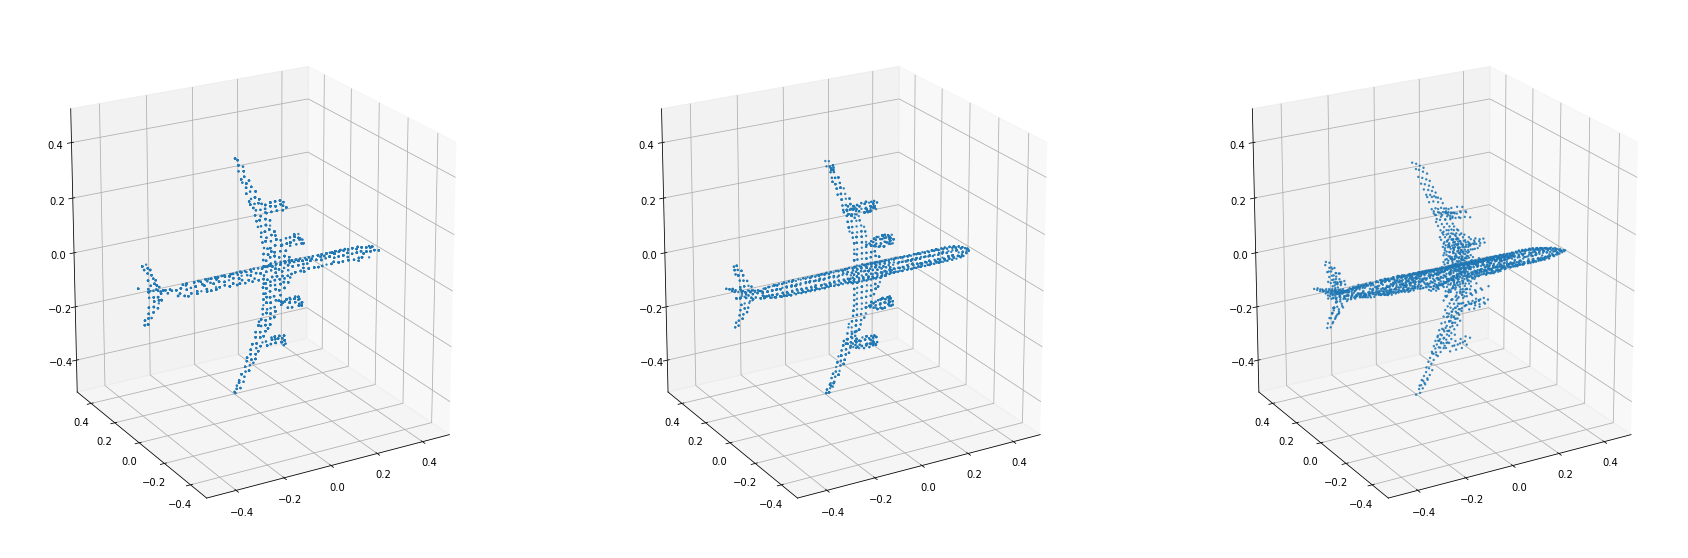

In [19]:
fig = plt.figure(figsize=(30,10))
ax_pred = fig.add_subplot(133, projection='3d')
ax_true = fig.add_subplot(132, projection='3d')
ax_orig = fig.add_subplot(131, projection='3d')
num = 50

plot_3d_point_cloud(gen_data['pred'][num][:,0], 
                    gen_data['pred'][num][:,1], 
                    gen_data['pred'][num][:,2], in_u_sphere=True,axis=ax_pred,show=False);
plot_3d_point_cloud(gen_data['true'][num][:,0], 
                    gen_data['true'][num][:,1], 
                    gen_data['true'][num][:,2], in_u_sphere=True,axis=ax_true,show=False);
plot_3d_point_cloud(gen_data['original'][num][:,0], 
                    gen_data['original'][num][:,1], 
                    gen_data['original'][num][:,2], in_u_sphere=True,axis=ax_orig,show=False);